In [1]:
## Churn Prediction

In [2]:
import pandas as pd
import numpy as  np
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
train_data = pd.read_csv("churn_training.csv")
test_data = pd.read_csv("churn_testing.csv")
print(train_data.shape)
print(test_data.shape)

(440833, 12)
(64374, 12)


In [7]:
combined_data = pd.concat([train_data,test_data],axis=0)
combined_data.reset_index(drop=True,inplace=True)
combined_data.shape

(505207, 12)

In [10]:
dataset = combined_data.sample(n=1000, random_state=42).reset_index(drop=True)
dataset.shape

(1000, 12)

In [11]:
#dataset.to_csv("sampled_dataset.csv", index=False)

In [26]:
## shape of dataset
df = dataset
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,92144.0,54.0,Male,5.0,20.0,1.0,3.0,Basic,Quarterly,421.00,15.0,1.0
1,45808.0,30.0,Female,33.0,21.0,10.0,27.0,Basic,Monthly,335.00,19.0,1.0
2,412308.0,48.0,Female,8.0,20.0,3.0,10.0,Basic,Quarterly,832.23,14.0,0.0
3,12380.0,34.0,Male,30.0,5.0,1.0,7.0,Premium,Monthly,535.00,12.0,0.0
4,103786.0,24.0,Female,26.0,2.0,4.0,23.0,Standard,Monthly,811.00,14.0,1.0


In [29]:
# Quick overview
print(df.shape)        # rows x columns
print(df.info())       # column types and missing values
print(df.head())       # first 5 rows


(1000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         1000 non-null   float64
 1   Age                1000 non-null   float64
 2   Gender             1000 non-null   object 
 3   Tenure             1000 non-null   float64
 4   Usage Frequency    1000 non-null   float64
 5   Support Calls      1000 non-null   float64
 6   Payment Delay      1000 non-null   float64
 7   Subscription Type  1000 non-null   object 
 8   Contract Length    1000 non-null   object 
 9   Total Spend        1000 non-null   float64
 10  Last Interaction   1000 non-null   float64
 11  Churn              1000 non-null   float64
dtypes: float64(9), object(3)
memory usage: 93.9+ KB
None
   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0     92144.0  54.0    Male     5.0             20.0            1.0   
1     45808

## Step 2: Check for Missing Values

In [30]:
# Count missing values per column
print(df.isnull().sum())

# Percentage missing
print(df.isnull().mean() * 100)


CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64
CustomerID           0.0
Age                  0.0
Gender               0.0
Tenure               0.0
Usage Frequency      0.0
Support Calls        0.0
Payment Delay        0.0
Subscription Type    0.0
Contract Length      0.0
Total Spend          0.0
Last Interaction     0.0
Churn                0.0
dtype: float64


## Step 3: Basic Statistics

In [33]:
# Numerical features
print(df.describe())

# Categorical features
print(df.describe(include='object'))


          CustomerID          Age       Tenure  Usage Frequency  \
count    1000.000000  1000.000000  1000.000000      1000.000000   
mean   193727.752000    39.635000    31.249000        15.943000   
std    137963.519091    13.076191    17.327528         8.685343   
min       492.000000    18.000000     1.000000         1.000000   
25%     59088.250000    29.000000    16.000000         8.000000   
50%    181754.500000    39.500000    32.000000        16.000000   
75%    308772.750000    49.000000    46.000000        24.000000   
max    448293.000000    65.000000    60.000000        30.000000   

       Support Calls  Payment Delay  Total Spend  Last Interaction  \
count    1000.000000    1000.000000   1000.00000       1000.000000   
mean        4.124000      13.325000    622.88119         15.092000   
std         3.168385       8.578751    243.33088          8.612532   
min         0.000000       0.000000    100.00000          1.000000   
25%         1.000000       6.000000    458.750

## Step 4: Check for Duplicates

In [34]:
print(df.duplicated().sum())
# Remove duplicates if necessary
df = df.drop_duplicates()


0


## Step 5: Explore Target Variable (if supervised)

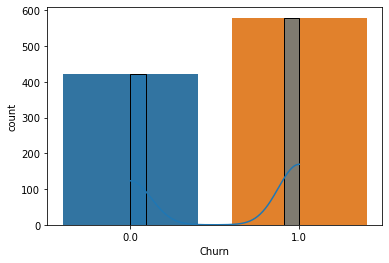

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# For classification
sns.countplot(x='Churn', data=df)

# For regression
sns.histplot(df['Churn'], kde=True)
plt.show()


## Step 6: Explore Features

In [37]:
### a) Numerical Features

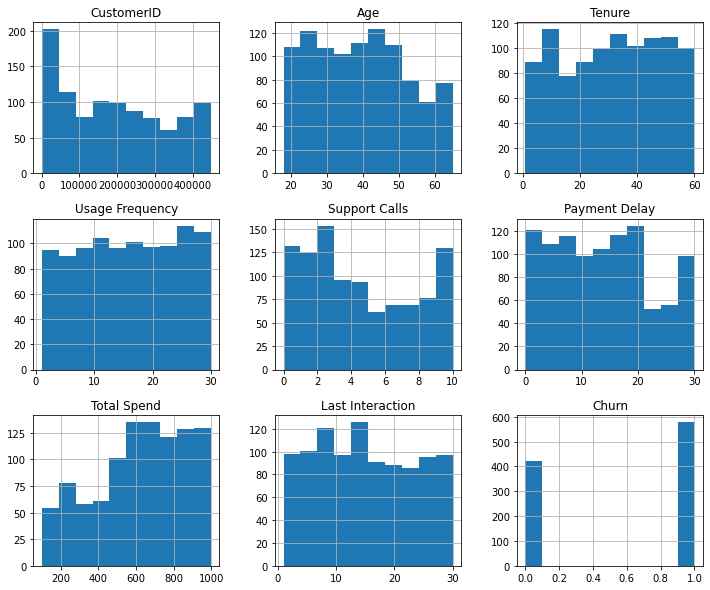

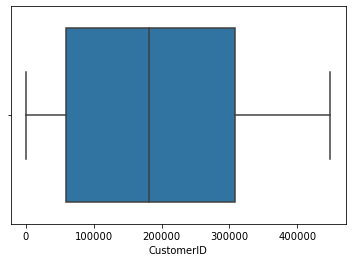

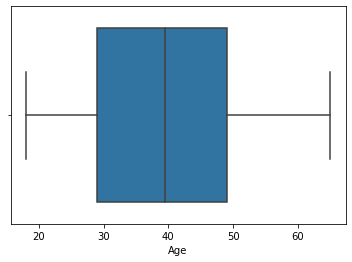

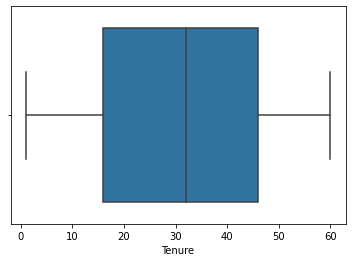

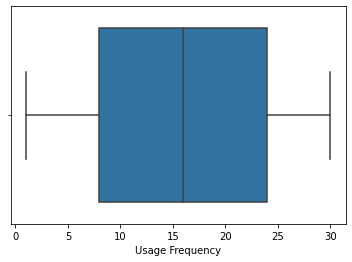

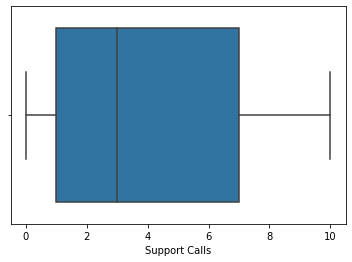

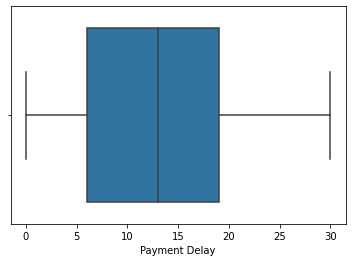

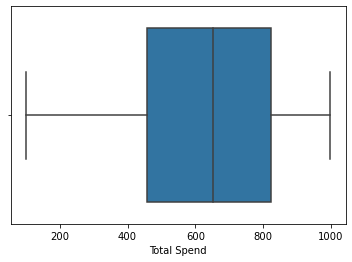

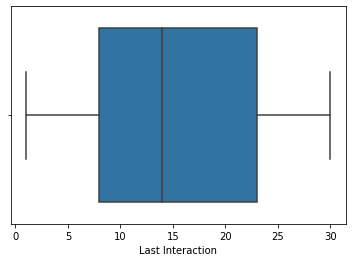

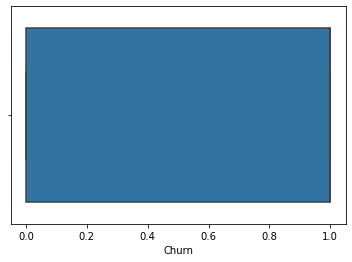

In [38]:
# Histograms
data.select_dtypes(include='number').hist(figsize=(12,10))
plt.show()

# Boxplots for outliers
for col in df.select_dtypes(include='number').columns:
    sns.boxplot(x=df[col])
    plt.show()


### b) Categorical Features

Male      565
Female    435
Name: Gender, dtype: int64


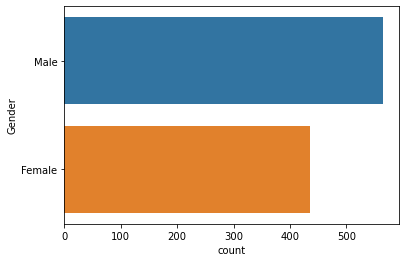

Premium     338
Basic       335
Standard    327
Name: Subscription Type, dtype: int64


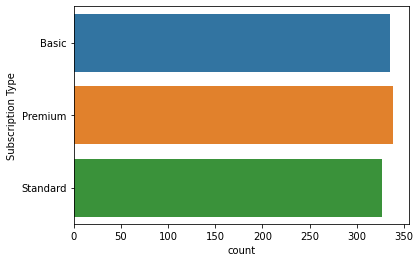

Annual       413
Quarterly    354
Monthly      233
Name: Contract Length, dtype: int64


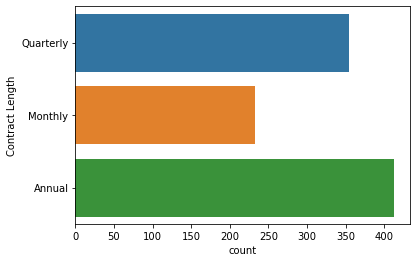

In [40]:
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())
    sns.countplot(y=col, data=df)
    plt.show()


## Step 7: Feature Relationships

#### Correlation (numerical features)

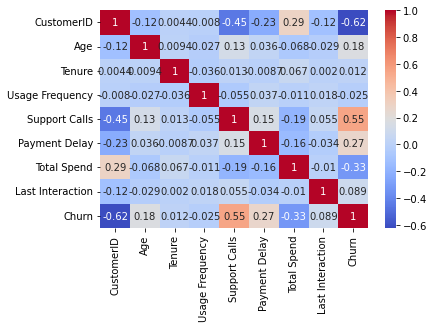

In [42]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


### Categorical vs Target

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         1000 non-null   float64
 1   Age                1000 non-null   float64
 2   Gender             1000 non-null   object 
 3   Tenure             1000 non-null   float64
 4   Usage Frequency    1000 non-null   float64
 5   Support Calls      1000 non-null   float64
 6   Payment Delay      1000 non-null   float64
 7   Subscription Type  1000 non-null   object 
 8   Contract Length    1000 non-null   object 
 9   Total Spend        1000 non-null   float64
 10  Last Interaction   1000 non-null   float64
 11  Churn              1000 non-null   float64
dtypes: float64(9), object(3)
memory usage: 101.6+ KB


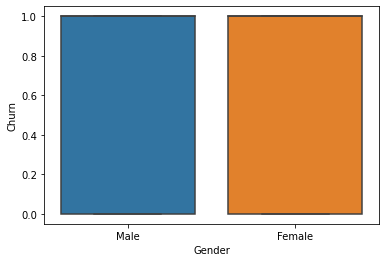

In [48]:
sns.boxplot(x='Gender', y='Churn', data=df)
plt.show()


### Numerical vs Target

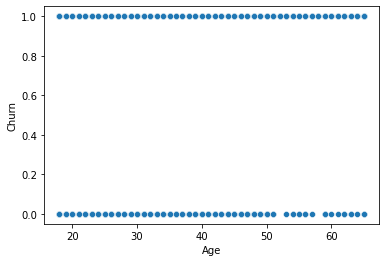

In [49]:
sns.scatterplot(x='Age', y='Churn', data=data)
plt.show()


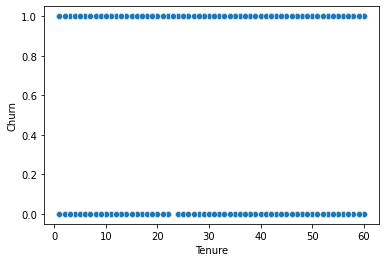

In [50]:
sns.scatterplot(x='Tenure', y='Churn', data=data)
plt.show()


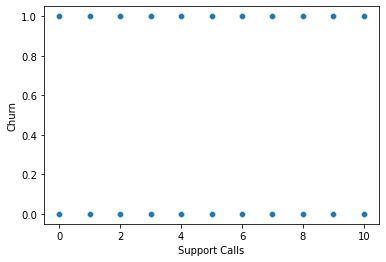

In [51]:
sns.scatterplot(x='Support Calls', y='Churn', data=data)
plt.show()


## Step 8: Handle Outliers

In [64]:
# Get numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Remove outliers using IQR
for col in numeric_cols:
    df = df.dropna(subset=[col])  # drop NaNs
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]

# Check result
print(df.shape)
print(df.describe())


(1000, 12)
          CustomerID          Age       Tenure  Usage Frequency  \
count    1000.000000  1000.000000  1000.000000      1000.000000   
mean   193727.752000    39.635000    31.249000        15.943000   
std    137963.519091    13.076191    17.327528         8.685343   
min       492.000000    18.000000     1.000000         1.000000   
25%     59088.250000    29.000000    16.000000         8.000000   
50%    181754.500000    39.500000    32.000000        16.000000   
75%    308772.750000    49.000000    46.000000        24.000000   
max    448293.000000    65.000000    60.000000        30.000000   

       Support Calls  Payment Delay  Total Spend  Last Interaction  \
count    1000.000000    1000.000000   1000.00000       1000.000000   
mean        4.124000      13.325000    622.88119         15.092000   
std         3.168385       8.578751    243.33088          8.612532   
min         0.000000       0.000000    100.00000          1.000000   
25%         1.000000       6.000000

In [65]:
df['Churn'].value_counts()

1.0    579
0.0    421
Name: Churn, dtype: int64

In [66]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,92144.0,54.0,Male,5.0,20.0,1.0,3.0,Basic,Quarterly,421.00,15.0,1.0
1,45808.0,30.0,Female,33.0,21.0,10.0,27.0,Basic,Monthly,335.00,19.0,1.0
2,412308.0,48.0,Female,8.0,20.0,3.0,10.0,Basic,Quarterly,832.23,14.0,0.0
3,12380.0,34.0,Male,30.0,5.0,1.0,7.0,Premium,Monthly,535.00,12.0,0.0
4,103786.0,24.0,Female,26.0,2.0,4.0,23.0,Standard,Monthly,811.00,14.0,1.0


In [68]:
final_df = df.drop('CustomerID',axis=1)
final_df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,54.0,Male,5.0,20.0,1.0,3.0,Basic,Quarterly,421.00,15.0,1.0
1,30.0,Female,33.0,21.0,10.0,27.0,Basic,Monthly,335.00,19.0,1.0
2,48.0,Female,8.0,20.0,3.0,10.0,Basic,Quarterly,832.23,14.0,0.0
3,34.0,Male,30.0,5.0,1.0,7.0,Premium,Monthly,535.00,12.0,0.0
4,24.0,Female,26.0,2.0,4.0,23.0,Standard,Monthly,811.00,14.0,1.0


In [69]:
categorical_colums = final_df.select_dtypes(include='object').columns
print(categorical_colums)

Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')


In [71]:
final_df = pd.get_dummies(final_df,columns=categorical_colums,drop_first=True)
final_df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,54.0,5.0,20.0,1.0,3.0,421.00,15.0,1.0,1,0,0,0,1
1,30.0,33.0,21.0,10.0,27.0,335.00,19.0,1.0,0,0,0,1,0
2,48.0,8.0,20.0,3.0,10.0,832.23,14.0,0.0,0,0,0,0,1
3,34.0,30.0,5.0,1.0,7.0,535.00,12.0,0.0,1,1,0,1,0
4,24.0,26.0,2.0,4.0,23.0,811.00,14.0,1.0,0,0,1,1,0


In [72]:
## split the data dependent and dependent variable
X = final_df.drop('Churn',axis=1)
y = final_df['Churn']
X.shape, y.shape

((1000, 12), (1000,))

In [75]:
## split the data into train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 12), (200, 12))

In [79]:
# Scale numeric features
from sklearn.preprocessing  import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train


array([[-0.89993753,  1.09711602,  1.52827608, ..., -0.68796548,
        -0.56772709, -0.74390729],
       [ 0.93784173,  1.32730034,  0.72126561, ...,  1.4535613 ,
         1.76140969, -0.74390729],
       [ 0.40182278,  1.21220818,  0.02954235, ..., -0.68796548,
        -0.56772709, -0.74390729],
       ...,
       [ 0.17210037,  1.1546621 ,  1.41298887, ..., -0.68796548,
        -0.56772709,  1.34425353],
       [-0.36391858,  0.80938562,  1.18241445, ...,  1.4535613 ,
        -0.56772709, -0.74390729],
       [ 0.47839691,  0.52165522, -0.20103207, ...,  1.4535613 ,
        -0.56772709, -0.74390729]])

In [76]:
## import liabary
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [80]:
# Step 4: Build the ANN model
model = Sequential()

# First hidden layer (32 neurons)
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))

# Second hidden layer (16 neurons)
model.add(Dense(16, activation='relu'))

# Output layer (1 neuron for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [81]:
# Step 5: Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # 20% of training data for validation
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
20/20 [==============================] - 1s 19ms/step - loss: 0.6802 - accuracy: 0.5625 - val_loss: 0.6327 - val_accuracy: 0.7063
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6119 - accuracy: 0.7094 - val_loss: 0.5753 - val_accuracy: 0.7563
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5542 - accuracy: 0.7578 - val_loss: 0.5251 - val_accuracy: 0.8000
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5037 - accuracy: 0.8094 - val_loss: 0.4807 - val_accuracy: 0.8313
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4612 - accuracy: 0.8250 - val_loss: 0.4450 - val_accuracy: 0.8375
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4256 - accuracy: 0.8469 - val_loss: 0.4213 - val_accuracy: 0.8375
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4005 - accuracy: 0.8516 - val_loss: 0.4053 - val_accuracy: 0.8375
Epoch 8/50
20/20 [=

In [82]:
# Step 6: Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

7/7 [==============================] - 0s 2ms/step


In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [89]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.855
Confusion Matrix:
 [[75 22]
 [ 7 96]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.77      0.84        97
         1.0       0.81      0.93      0.87       103

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



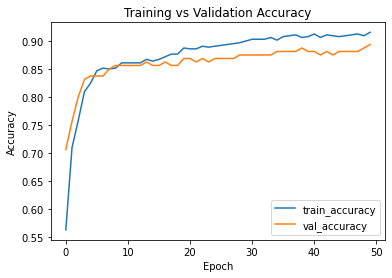

In [86]:
# Step 7: Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


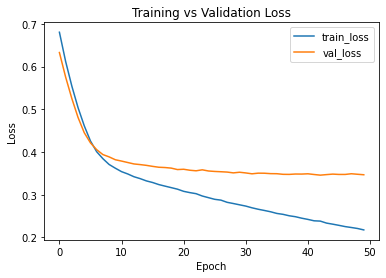

In [87]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()